### Training neuron networks

We will work on three replicates of our dataset : \
    - data - the whole dataset partially preprocessed \
    - manually_selected_data - manually selected features, partially preprocessed \
    - automatically_selected_data - automatically selected features, partially preprocessed

Let's read our datasets

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def load_data(filename, FOLDER="./data"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path)

In [3]:
data = load_data("preprocessed_data.csv")
display(data.head())

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customming_years,Age
0,Graduation,Single,0.357999,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.792683
1,Graduation,Single,0.285375,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.829268
2,Graduation,Together,0.440975,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0,0.666667,0.695122
3,Graduation,Together,0.164079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.463415
4,PhD,Married,0.358954,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.500000


In [4]:
manually_selected_data = load_data("manually_selected_data.csv")
display(manually_selected_data.head())

,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,Income,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Customming_years,Response
0,0.0,0.0,0.585859,0.425318,0.316522,0.357999,0.357143,0.0,0.0,0.0,0.0,1.000000,1
1,0.5,0.5,0.383838,0.007368,0.003478,0.285375,0.035714,0.0,0.0,0.0,0.0,0.333333,0
2,0.0,0.0,0.262626,0.285332,0.073623,0.440975,0.071429,0.0,0.0,0.0,0.0,0.666667,0
3,0.5,0.0,0.262626,0.007368,0.011594,0.164079,0.000000,0.0,0.0,0.0,0.0,0.333333,0
4,0.5,0.0,0.949495,0.115874,0.068406,0.358954,0.107143,0.0,0.0,0.0,0.0,0.333333,0


In [5]:
atomatically_selected_data = load_data("atomatically_selected_data.csv")
display(atomatically_selected_data.head())

,Recency,MntMeatProducts,Income,MntWines,MntGoldProds,AcceptedCmp5,Age,AcceptedCmp3,MntFishProducts,MntSweetProducts,MntFruits,NumWebVisitsMonth,NumCatalogPurchases,Response
0,0.585859,0.316522,0.357999,0.425318,0.243094,0.0,0.792683,0.0,0.664093,0.334601,0.442211,0.35,0.357143,1
1,0.383838,0.003478,0.285375,0.007368,0.016575,0.0,0.829268,0.0,0.007722,0.003802,0.005025,0.25,0.035714,0
2,0.262626,0.073623,0.440975,0.285332,0.116022,0.0,0.695122,0.0,0.428571,0.079848,0.246231,0.20,0.071429,0
3,0.262626,0.011594,0.164079,0.007368,0.013812,0.0,0.463415,0.0,0.038610,0.011407,0.020101,0.30,0.000000,0
4,0.949495,0.068406,0.358954,0.115874,0.041436,0.0,0.500000,0.0,0.177606,0.102662,0.216080,0.25,0.107143,0


Let's devide columns to numeric and categorical for all 3 datasets

In [6]:
data_numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
manual_data_numerical_columns = manually_selected_data.select_dtypes(include=np.number).columns.tolist()
atomatical_data_numerical_columns = atomatically_selected_data.select_dtypes(include=np.number).columns.tolist()

data_categorical_columns = ['Education', 'Marital_Status']

data_numerical_columns.remove('Response')
manual_data_numerical_columns.remove('Response')
atomatical_data_numerical_columns.remove('Response')

#### Let's create data frame selector

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

We will define preprocessing with special pipelines for numerical and categorical values

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion

data_num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(data_numerical_columns)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

data_cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(data_categorical_columns)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

data_preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", data_num_pipeline),
        ("cat_pipeline", data_cat_pipeline),
    ])

manual_preprocess_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(manual_data_numerical_columns)),
         ("imputer", SimpleImputer(strategy="median")),
    ])

atomatic_preprocess_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(atomatical_data_numerical_columns)),
         ("imputer", SimpleImputer(strategy="median")),
    ])

### Devide our dataset for data and target

In [9]:
X_data = data.drop(['Response'], axis=1)
X_manual = manually_selected_data.drop(['Response'], axis=1)
X_atomatic = atomatically_selected_data.drop(['Response'], axis=1)

y_data = data['Response'].values
y_manual = manually_selected_data['Response'].values
y_atomatic = atomatically_selected_data['Response'].values

### Devide our dataset for test and train sets

In [10]:
from sklearn.model_selection import train_test_split

X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 50)
X_manual_train, X_manual_test, y_manual_train, y_manual_test = \
            train_test_split(X_manual, y_manual, test_size = 0.3, random_state = 50)
X_atomatic_train, X_atomatic_test, y_atomatic_train, y_atomatic_test = \
            train_test_split(X_atomatic, y_atomatic, test_size = 0.3, random_state = 50)

In [11]:
data_cat_pipeline.fit_transform(X_data_train)
data_num_pipeline.fit_transform(X_data_train)

manual_preprocess_pipeline.fit_transform(X_manual_train)
atomatic_preprocess_pipeline.fit_transform(X_atomatic_train)

array([[0.92929293, 0.07072464, 0.21210367, ..., 0.61306533, 0.45      ,
        0.07142857],
       [0.81818182, 0.05101449, 0.3573034 , ..., 0.15577889, 0.2       ,
        0.07142857],
       [0.65656566, 0.07710145, 0.34562831, ..., 0.24120603, 0.2       ,
        0.07142857],
       ...,
       [0.50505051, 0.10724638, 0.46739164, ..., 0.54271357, 0.15      ,
        0.21428571],
       [0.88888889, 0.10956522, 0.28801025, ..., 0.52261307, 0.4       ,
        0.28571429],
       [0.68686869, 0.08173913, 0.21672814, ..., 0.06030151, 0.4       ,
        0.03571429]])

### Sieci neuronowe 

In [12]:
X_data_train = data_preprocess_pipeline.transform(X_data_train)
X_data_test = data_preprocess_pipeline.transform(X_data_test)

In [13]:
X_manual_train = manual_preprocess_pipeline.transform(X_manual_train)
X_manual_test = manual_preprocess_pipeline.transform(X_manual_test)

In [14]:
X_atomatic_train = atomatic_preprocess_pipeline.transform(X_atomatic_train)
X_atomatic_test = atomatic_preprocess_pipeline.transform(X_atomatic_test)

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [16]:
model_1_data = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_data_train.shape[1], )),
              Dense(50, activation='relu', name="1nd_layer"),
              Dense(20, activation='relu', name="2nd_layer"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_1_data")

model_1_manual = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_manual_train.shape[1], )),
              Dense(50, activation='relu', name="1nd_layer"),
              Dense(20, activation='relu', name="2nd_layer"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_1_manual")

model_1_atomatic = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_atomatic_train.shape[1], )),
              Dense(50, activation='relu', name="1nd_layer"),
              Dense(20, activation='relu', name="2nd_layer"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_1_atomatic")



model_1_data.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

model_1_manual.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

model_1_atomatic.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

In [17]:
history_1_data = model_1_data.fit(X_data_train, y_data_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_data_test, y_data_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 0s 9ms/step - loss: 0.4699 - accuracy: 0.8351 - recall: 0.0082 - precision: 0.1053 - val_loss: 0.3692 - val_accuracy: 0.8644 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8518 - recall: 0.0535 - precision: 0.8667 - val_loss: 0.2891 - val_accuracy: 0.8957 - val_recall: 0.2747 - val_precision: 0.8621
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8728 - recall: 0.2551 - precision: 0.7750 - val_loss: 0.2536 - val_accuracy: 0.9076 - val_recall: 0.4176 - val_precision: 0.8085
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8850 - recall: 0.4074 - precision: 0.7333 - val_loss: 0.2366 - val_accuracy: 0.9031 - val_recall: 0.4396 - val_precision: 0.7407
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.8907 -

49/49 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9585 - recall: 0.8395 - precision: 0.8870 - val_loss: 0.3678 - val_accuracy: 0.8823 - val_recall: 0.5165 - val_precision: 0.5732
Epoch 38/100
49/49 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.9514 - recall: 0.8148 - precision: 0.8646 - val_loss: 0.3662 - val_accuracy: 0.8882 - val_recall: 0.4945 - val_precision: 0.6081
Epoch 39/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9585 - recall: 0.8148 - precision: 0.9083 - val_loss: 0.3690 - val_accuracy: 0.8882 - val_recall: 0.6593 - val_precision: 0.5769
Epoch 40/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9661 - recall: 0.8560 - precision: 0.9204 - val_loss: 0.3927 - val_accuracy: 0.8554 - val_recall: 0.6813 - val_precision: 0.4769
Epoch 41/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9629 - recall: 0.8560 

Epoch 74/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9827 - recall: 0.9342 - precision: 0.9538 - val_loss: 0.6255 - val_accuracy: 0.8584 - val_recall: 0.6374 - val_precision: 0.4833
Epoch 75/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9821 - recall: 0.9300 - precision: 0.9536 - val_loss: 0.5879 - val_accuracy: 0.8927 - val_recall: 0.5055 - val_precision: 0.6301
Epoch 76/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9821 - recall: 0.9383 - precision: 0.9461 - val_loss: 0.6237 - val_accuracy: 0.8763 - val_recall: 0.5495 - val_precision: 0.5435
Epoch 77/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9808 - recall: 0.9300 - precision: 0.9456 - val_loss: 0.6202 - val_accuracy: 0.8733 - val_recall: 0.5604 - val_precision: 0.5312
Epoch 78/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9840 - re

In [18]:
history_1_manual = model_1_manual.fit(X_manual_train, y_manual_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_manual_test, y_manual_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5006 - accuracy: 0.8447 - recall_1: 0.0329 - precision_1: 0.5000 - val_loss: 0.3540 - val_accuracy: 0.8703 - val_recall_1: 0.0440 - val_precision_1: 1.0000
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8645 - recall_1: 0.1975 - precision_1: 0.7385 - val_loss: 0.2846 - val_accuracy: 0.8987 - val_recall_1: 0.3626 - val_precision_1: 0.7674
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8792 - recall_1: 0.3498 - precision_1: 0.7328 - val_loss: 0.2914 - val_accuracy: 0.8912 - val_recall_1: 0.4286 - val_precision_1: 0.6500
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8748 - recall_1: 0.3539 - precision_1: 0.6880 - val_loss: 0.2694 - val_accuracy: 0.8957 - val_recall_1: 0.3187 - val_precision_1: 0.7838
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3

49/49 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8939 - recall_1: 0.4691 - precision_1: 0.7550 - val_loss: 0.2683 - val_accuracy: 0.8942 - val_recall_1: 0.4286 - val_precision_1: 0.6724
Epoch 37/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.8875 - recall_1: 0.4403 - precision_1: 0.7279 - val_loss: 0.2702 - val_accuracy: 0.8882 - val_recall_1: 0.3956 - val_precision_1: 0.6429
Epoch 38/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.8952 - recall_1: 0.4444 - precision_1: 0.7883 - val_loss: 0.2717 - val_accuracy: 0.8897 - val_recall_1: 0.4176 - val_precision_1: 0.6441
Epoch 39/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8946 - recall_1: 0.4527 - precision_1: 0.7746 - val_loss: 0.2679 - val_accuracy: 0.8897 - val_recall_1: 0.4286 - val_precision_1: 0.6393
Epoch 40/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2586 - ac

49/49 [==============================] - 0s 4ms/step - loss: 0.2223 - accuracy: 0.9118 - recall_1: 0.5556 - precision_1: 0.8182 - val_loss: 0.3046 - val_accuracy: 0.8912 - val_recall_1: 0.4835 - val_precision_1: 0.6286
Epoch 72/100
49/49 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9105 - recall_1: 0.5473 - precision_1: 0.8160 - val_loss: 0.3057 - val_accuracy: 0.8927 - val_recall_1: 0.4286 - val_precision_1: 0.6610
Epoch 73/100
49/49 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9105 - recall_1: 0.5432 - precision_1: 0.8199 - val_loss: 0.3122 - val_accuracy: 0.8882 - val_recall_1: 0.4725 - val_precision_1: 0.6143
Epoch 74/100
49/49 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9125 - recall_1: 0.5514 - precision_1: 0.8272 - val_loss: 0.3044 - val_accuracy: 0.8927 - val_recall_1: 0.4615 - val_precision_1: 0.6462
Epoch 75/100
49/49 [==============================] - 0s 3ms/step - loss: 0.2211 - ac

In [19]:
history_1_atomatic = model_1_atomatic.fit(X_atomatic_train, y_atomatic_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_atomatic_test, y_atomatic_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 1s 19ms/step - loss: 0.5816 - accuracy: 0.7891 - recall_2: 0.0741 - precision_2: 0.1463 - val_loss: 0.4176 - val_accuracy: 0.8644 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8447 - recall_2: 0.0000e+00 - precision_2: 0.0000e+00 - val_loss: 0.3358 - val_accuracy: 0.8689 - val_recall_2: 0.0440 - val_precision_2: 0.8000
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 0.3595 - accuracy: 0.8556 - recall_2: 0.2058 - precision_2: 0.6024 - val_loss: 0.3053 - val_accuracy: 0.8808 - val_recall_2: 0.3297 - val_precision_2: 0.6122
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8652 - recall_2: 0.2881 - precision_2: 0.6481 - val_loss: 0.3048 - val_accuracy: 0.8838 - val_recall_2: 0.2308 - val_precision_2: 0.7241
Epoch 5/100
49/49 [==============================] - 0s 3ms

49/49 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8888 - recall_2: 0.4321 - precision_2: 0.7447 - val_loss: 0.2826 - val_accuracy: 0.8778 - val_recall_2: 0.2967 - val_precision_2: 0.6000
Epoch 37/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.8863 - recall_2: 0.4074 - precision_2: 0.7444 - val_loss: 0.2929 - val_accuracy: 0.8718 - val_recall_2: 0.3407 - val_precision_2: 0.5439
Epoch 38/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.8869 - recall_2: 0.4156 - precision_2: 0.7426 - val_loss: 0.2932 - val_accuracy: 0.8659 - val_recall_2: 0.3187 - val_precision_2: 0.5088
Epoch 39/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8850 - recall_2: 0.4156 - precision_2: 0.7266 - val_loss: 0.3023 - val_accuracy: 0.8659 - val_recall_2: 0.3956 - val_precision_2: 0.5070
Epoch 40/100
49/49 [==============================] - 0s 3ms/step - loss: 0.2796 - ac

49/49 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9061 - recall_2: 0.5226 - precision_2: 0.8038 - val_loss: 0.3372 - val_accuracy: 0.8674 - val_recall_2: 0.2747 - val_precision_2: 0.5208
Epoch 72/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9118 - recall_2: 0.5391 - precision_2: 0.8344 - val_loss: 0.3471 - val_accuracy: 0.8569 - val_recall_2: 0.3736 - val_precision_2: 0.4658
Epoch 73/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9176 - recall_2: 0.5802 - precision_2: 0.8393 - val_loss: 0.3498 - val_accuracy: 0.8644 - val_recall_2: 0.4176 - val_precision_2: 0.5000
Epoch 74/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9163 - recall_2: 0.5761 - precision_2: 0.8333 - val_loss: 0.3486 - val_accuracy: 0.8629 - val_recall_2: 0.2857 - val_precision_2: 0.4906
Epoch 75/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2191 - ac

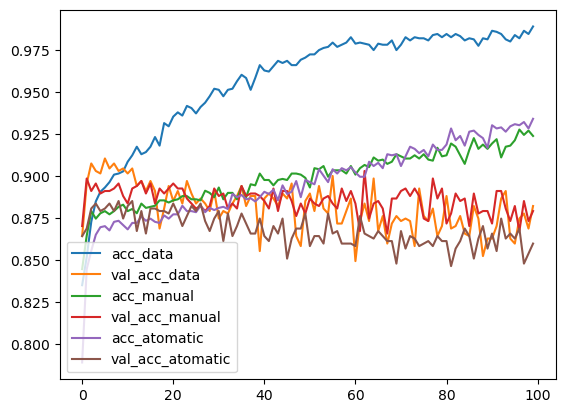

In [20]:
plt.plot(pd.DataFrame(history_1_data.history['accuracy']), label='acc_data')
plt.plot(pd.DataFrame(history_1_data.history['val_accuracy']), label='val_acc_data')
plt.plot(pd.DataFrame(history_1_manual.history['accuracy']), label='acc_manual')
plt.plot(pd.DataFrame(history_1_manual.history['val_accuracy']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_1_atomatic.history['accuracy']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_1_atomatic.history['val_accuracy']), label='val_acc_atomatic')

plt.legend()
plt.show()

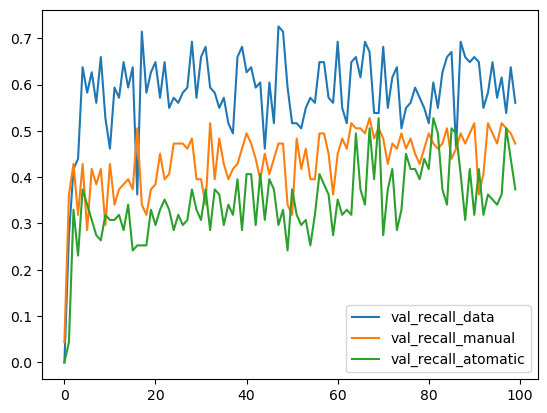

In [22]:
plt.plot(pd.DataFrame(history_1_data.history['val_recall']), label='val_recall_data')
plt.plot(pd.DataFrame(history_1_manual.history['val_recall_1']), label='val_recall_manual')
plt.plot(pd.DataFrame(history_1_atomatic.history['val_recall_2']), label='val_recall_atomatic')

plt.legend()
plt.show()

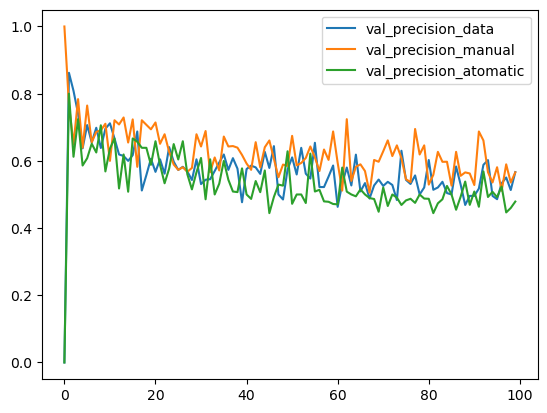

In [23]:
plt.plot(pd.DataFrame(history_1_data.history['val_precision']), label='val_precision_data')
plt.plot(pd.DataFrame(history_1_manual.history['val_precision_1']), label='val_precision_manual')
plt.plot(pd.DataFrame(history_1_atomatic.history['val_precision_2']), label='val_precision_atomatic')

plt.legend()
plt.show()

In [24]:
model_2_data = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_data_train.shape[1], )),
              Dropout(0.2),
              Dense(50, activation='relu', name="1nd_layer"),
              Dropout(0.2),
              Dense(20, activation='relu', name="2nd_layer"),
              Dropout(0.2),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_2_data")

model_2_manual = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_manual_train.shape[1], )),
              Dropout(0.2),
              Dense(50, activation='relu', name="1nd_layer"),
              Dropout(0.2),
              Dense(20, activation='relu', name="2nd_layer"),
              Dropout(0.2),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_2_manual")

model_2_atomatic = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_atomatic_train.shape[1], )),
              Dropout(0.2),
              Dense(50, activation='relu', name="1nd_layer"),
              Dropout(0.2),
              Dense(20, activation='relu', name="2nd_layer"),
              Dropout(0.2),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_2_atomatic")


model_2_data.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

model_2_manual.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

model_2_atomatic.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])


In [25]:
history_2_data = model_2_data.fit(X_data_train, y_data_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_data_test, y_data_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 1s 13ms/step - loss: 0.5891 - accuracy: 0.7284 - recall_3: 0.1934 - precision_3: 0.1703 - val_loss: 0.4089 - val_accuracy: 0.8644 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8447 - recall_3: 0.0000e+00 - precision_3: 0.0000e+00 - val_loss: 0.3480 - val_accuracy: 0.8644 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8511 - recall_3: 0.0576 - precision_3: 0.7778 - val_loss: 0.2914 - val_accuracy: 0.8852 - val_recall_3: 0.2198 - val_precision_3: 0.7692
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8581 - recall_3: 0.1646 - precision_3: 0.6780 - val_loss: 0.2727 - val_accuracy: 0.9001 - val_recall_3: 0.3407 - val_precision_3: 0.8158
Epoch 5/100
49/49 [==============================] 

49/49 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9220 - recall_3: 0.6379 - precision_3: 0.8201 - val_loss: 0.2544 - val_accuracy: 0.9031 - val_recall_3: 0.5714 - val_precision_3: 0.6667
Epoch 37/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9310 - recall_3: 0.6955 - precision_3: 0.8325 - val_loss: 0.2604 - val_accuracy: 0.8912 - val_recall_3: 0.6264 - val_precision_3: 0.5938
Epoch 38/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9323 - recall_3: 0.6872 - precision_3: 0.8477 - val_loss: 0.2708 - val_accuracy: 0.8942 - val_recall_3: 0.6593 - val_precision_3: 0.6000
Epoch 39/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9342 - recall_3: 0.6996 - precision_3: 0.8500 - val_loss: 0.2675 - val_accuracy: 0.9046 - val_recall_3: 0.5604 - val_precision_3: 0.6800
Epoch 40/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1865 - ac

49/49 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9540 - recall_3: 0.7942 - precision_3: 0.8977 - val_loss: 0.3641 - val_accuracy: 0.8882 - val_recall_3: 0.6593 - val_precision_3: 0.5769
Epoch 72/100
49/49 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9565 - recall_3: 0.8107 - precision_3: 0.8995 - val_loss: 0.3520 - val_accuracy: 0.8912 - val_recall_3: 0.6264 - val_precision_3: 0.5938
Epoch 73/100
49/49 [==============================] - 0s 5ms/step - loss: 0.1168 - accuracy: 0.9559 - recall_3: 0.7901 - precision_3: 0.9143 - val_loss: 0.3642 - val_accuracy: 0.8972 - val_recall_3: 0.6593 - val_precision_3: 0.6122
Epoch 74/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1297 - accuracy: 0.9457 - recall_3: 0.7819 - precision_3: 0.8559 - val_loss: 0.3690 - val_accuracy: 0.8987 - val_recall_3: 0.6374 - val_precision_3: 0.6237
Epoch 75/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1192 - ac

In [26]:
history_2_manual = model_2_manual.fit(X_manual_train, y_manual_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_manual_test, y_manual_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5083 - accuracy: 0.8300 - recall_4: 0.0370 - precision_4: 0.2195 - val_loss: 0.3516 - val_accuracy: 0.8644 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8466 - recall_4: 0.0123 - precision_4: 1.0000 - val_loss: 0.3015 - val_accuracy: 0.8644 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3550 - accuracy: 0.8639 - recall_4: 0.1646 - precision_4: 0.8000 - val_loss: 0.2827 - val_accuracy: 0.8942 - val_recall_4: 0.2967 - val_precision_4: 0.7941
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3546 - accuracy: 0.8645 - recall_4: 0.2675 - precision_4: 0.6566 - val_loss: 0.2755 - val_accuracy: 0.8957 - val_recall_4: 0.3407 - val_precision_4: 0.7561
Epoch 5/100
49/49 [==============================] - 0s 4ms/

49/49 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8895 - recall_4: 0.4074 - precision_4: 0.7734 - val_loss: 0.2586 - val_accuracy: 0.8912 - val_recall_4: 0.4066 - val_precision_4: 0.6607
Epoch 37/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8843 - recall_4: 0.3827 - precision_4: 0.7500 - val_loss: 0.2588 - val_accuracy: 0.8852 - val_recall_4: 0.3846 - val_precision_4: 0.6250
Epoch 38/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8812 - recall_4: 0.4074 - precision_4: 0.7021 - val_loss: 0.2598 - val_accuracy: 0.8852 - val_recall_4: 0.3846 - val_precision_4: 0.6250
Epoch 39/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.8888 - recall_4: 0.4115 - precision_4: 0.7634 - val_loss: 0.2626 - val_accuracy: 0.8823 - val_recall_4: 0.4396 - val_precision_4: 0.5882
Epoch 40/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2890 - ac

49/49 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8971 - recall_4: 0.4691 - precision_4: 0.7808 - val_loss: 0.2621 - val_accuracy: 0.8927 - val_recall_4: 0.4176 - val_precision_4: 0.6667
Epoch 72/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.8933 - recall_4: 0.4609 - precision_4: 0.7568 - val_loss: 0.2633 - val_accuracy: 0.8897 - val_recall_4: 0.4176 - val_precision_4: 0.6441
Epoch 73/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8907 - recall_4: 0.4609 - precision_4: 0.7368 - val_loss: 0.2665 - val_accuracy: 0.8897 - val_recall_4: 0.4396 - val_precision_4: 0.6349
Epoch 74/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8958 - recall_4: 0.4897 - precision_4: 0.7532 - val_loss: 0.2627 - val_accuracy: 0.8882 - val_recall_4: 0.4505 - val_precision_4: 0.6212
Epoch 75/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2656 - ac

In [27]:
history_2_atomatic = model_2_atomatic.fit(X_atomatic_train, y_atomatic_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_atomatic_test, y_atomatic_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5847 - accuracy: 0.7329 - recall_5: 0.0782 - precision_5: 0.0892 - val_loss: 0.4066 - val_accuracy: 0.8644 - val_recall_5: 0.0000e+00 - val_precision_5: 0.0000e+00
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8447 - recall_5: 0.0000e+00 - precision_5: 0.0000e+00 - val_loss: 0.3307 - val_accuracy: 0.8644 - val_recall_5: 0.0000e+00 - val_precision_5: 0.0000e+00
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8479 - recall_5: 0.0617 - precision_5: 0.6000 - val_loss: 0.3098 - val_accuracy: 0.8793 - val_recall_5: 0.1868 - val_precision_5: 0.7083
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8537 - recall_5: 0.1523 - precision_5: 0.6167 - val_loss: 0.3010 - val_accuracy: 0.8808 - val_recall_5: 0.2308 - val_precision_5: 0.6774
Epoch 5/100
49/49 [==============================] -

49/49 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8716 - recall_5: 0.3621 - precision_5: 0.6567 - val_loss: 0.2932 - val_accuracy: 0.8659 - val_recall_5: 0.4176 - val_precision_5: 0.5067
Epoch 37/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8818 - recall_5: 0.4156 - precision_5: 0.7014 - val_loss: 0.2935 - val_accuracy: 0.8674 - val_recall_5: 0.4066 - val_precision_5: 0.5139
Epoch 38/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8760 - recall_5: 0.4156 - precision_5: 0.6601 - val_loss: 0.2902 - val_accuracy: 0.8659 - val_recall_5: 0.3187 - val_precision_5: 0.5088
Epoch 39/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8748 - recall_5: 0.3128 - precision_5: 0.7238 - val_loss: 0.2904 - val_accuracy: 0.8629 - val_recall_5: 0.3187 - val_precision_5: 0.4915
Epoch 40/100
49/49 [==============================] - 0s 2ms/step - loss: 0.2972 - ac

49/49 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 0.8927 - recall_5: 0.5350 - precision_5: 0.7027 - val_loss: 0.3033 - val_accuracy: 0.8748 - val_recall_5: 0.3516 - val_precision_5: 0.5614
Epoch 72/100
49/49 [==============================] - 0s 4ms/step - loss: 0.2624 - accuracy: 0.8952 - recall_5: 0.4815 - precision_5: 0.7548 - val_loss: 0.3038 - val_accuracy: 0.8748 - val_recall_5: 0.4066 - val_precision_5: 0.5522
Epoch 73/100
49/49 [==============================] - 0s 4ms/step - loss: 0.2597 - accuracy: 0.8907 - recall_5: 0.4897 - precision_5: 0.7169 - val_loss: 0.3136 - val_accuracy: 0.8644 - val_recall_5: 0.4286 - val_precision_5: 0.5000
Epoch 74/100
49/49 [==============================] - 0s 4ms/step - loss: 0.2611 - accuracy: 0.8875 - recall_5: 0.4650 - precision_5: 0.7107 - val_loss: 0.3051 - val_accuracy: 0.8763 - val_recall_5: 0.3516 - val_precision_5: 0.5714
Epoch 75/100
49/49 [==============================] - 0s 4ms/step - loss: 0.2577 - ac

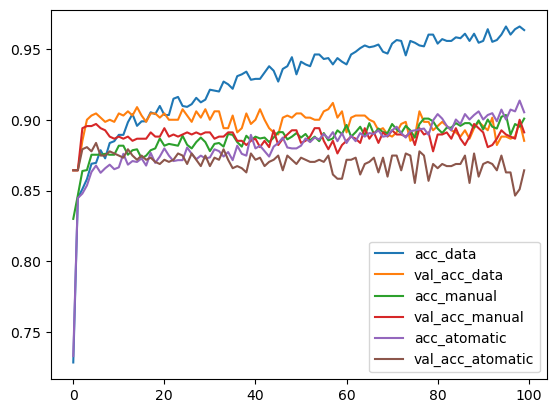

In [28]:
plt.plot(pd.DataFrame(history_2_data.history['accuracy']), label='acc_data')
plt.plot(pd.DataFrame(history_2_data.history['val_accuracy']), label='val_acc_data')
plt.plot(pd.DataFrame(history_2_manual.history['accuracy']), label='acc_manual')
plt.plot(pd.DataFrame(history_2_manual.history['val_accuracy']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_2_atomatic.history['accuracy']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_2_atomatic.history['val_accuracy']), label='val_acc_atomatic')

plt.legend()
plt.show()

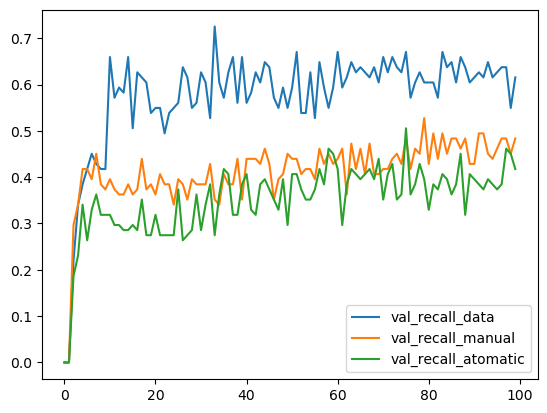

In [29]:
plt.plot(pd.DataFrame(history_2_data.history['val_recall_3']), label='val_recall_data')
plt.plot(pd.DataFrame(history_2_manual.history['val_recall_4']), label='val_recall_manual')
plt.plot(pd.DataFrame(history_2_atomatic.history['val_recall_5']), label='val_recall_atomatic')

plt.legend()
plt.show()

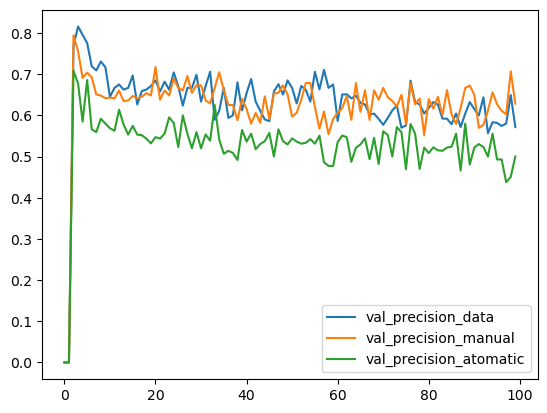

In [30]:
plt.plot(pd.DataFrame(history_2_data.history['val_precision_3']), label='val_precision_data')
plt.plot(pd.DataFrame(history_2_manual.history['val_precision_4']), label='val_precision_manual')
plt.plot(pd.DataFrame(history_2_atomatic.history['val_precision_5']), label='val_precision_atomatic')

plt.legend()
plt.show()

In [31]:
model_3_data = keras.Sequential([
              Dense(75, use_bias=False, name="input_layer", input_shape=(X_data_train.shape[1], )),
              BatchNormalization(),
              Activation("relu"),
              Dense(50, use_bias=False, name="1nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(20, use_bias=False, name="2nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_3_data")

model_3_manual = keras.Sequential([
              Dense(75, use_bias=False, name="input_layer", input_shape=(X_manual_train.shape[1], )),
              BatchNormalization(),
              Activation("relu"),
              Dense(50, use_bias=False, name="1nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(20, use_bias=False, name="2nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_3_manual")

model_3_atomatic = keras.Sequential([
              Dense(75, use_bias=False, name="input_layer", input_shape=(X_atomatic_train.shape[1], )),
              BatchNormalization(),
              Activation("relu"),
              Dense(50, use_bias=False, name="1nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(20, use_bias=False, name="2nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_3_atomatic")

model_3_data.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])
model_3_manual.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])
model_3_atomatic.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

In [32]:
history_3_data = model_3_data.fit(X_data_train, y_data_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_data_test, y_data_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 1s 11ms/step - loss: 0.6182 - accuracy: 0.6824 - recall_6: 0.6091 - precision_6: 0.2691 - val_loss: 0.5902 - val_accuracy: 0.8763 - val_recall_6: 0.1868 - val_precision_6: 0.6538
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 0.4219 - accuracy: 0.8460 - recall_6: 0.5761 - precision_6: 0.5036 - val_loss: 0.4839 - val_accuracy: 0.8703 - val_recall_6: 0.0769 - val_precision_6: 0.7000
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3356 - accuracy: 0.8920 - recall_6: 0.5720 - precision_6: 0.6814 - val_loss: 0.4060 - val_accuracy: 0.8793 - val_recall_6: 0.1429 - val_precision_6: 0.8125
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.8997 - recall_6: 0.5885 - precision_6: 0.7150 - val_loss: 0.3451 - val_accuracy: 0.8852 - val_recall_6: 0.1978 - val_precision_6: 0.8182
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 0.

49/49 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9623 - recall_6: 0.8272 - precision_6: 0.9220 - val_loss: 0.3564 - val_accuracy: 0.8912 - val_recall_6: 0.6264 - val_precision_6: 0.5938
Epoch 37/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.9738 - recall_6: 0.8848 - precision_6: 0.9430 - val_loss: 0.3817 - val_accuracy: 0.8897 - val_recall_6: 0.6374 - val_precision_6: 0.5859
Epoch 38/100
49/49 [==============================] - 0s 5ms/step - loss: 0.0938 - accuracy: 0.9674 - recall_6: 0.8642 - precision_6: 0.9211 - val_loss: 0.3711 - val_accuracy: 0.8823 - val_recall_6: 0.5934 - val_precision_6: 0.5625
Epoch 39/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.9655 - recall_6: 0.8765 - precision_6: 0.8987 - val_loss: 0.4319 - val_accuracy: 0.8748 - val_recall_6: 0.4725 - val_precision_6: 0.5443
Epoch 40/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0803 - ac

49/49 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 0.9751 - recall_6: 0.9177 - precision_6: 0.9215 - val_loss: 0.4765 - val_accuracy: 0.8927 - val_recall_6: 0.5934 - val_precision_6: 0.6067
Epoch 72/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0556 - accuracy: 0.9796 - recall_6: 0.9136 - precision_6: 0.9528 - val_loss: 0.4851 - val_accuracy: 0.8852 - val_recall_6: 0.5714 - val_precision_6: 0.5778
Epoch 73/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 0.9751 - recall_6: 0.9218 - precision_6: 0.9180 - val_loss: 0.4563 - val_accuracy: 0.9016 - val_recall_6: 0.5714 - val_precision_6: 0.6582
Epoch 74/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9827 - recall_6: 0.9342 - precision_6: 0.9538 - val_loss: 0.4612 - val_accuracy: 0.8838 - val_recall_6: 0.5714 - val_precision_6: 0.5714
Epoch 75/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0541 - ac

In [33]:
history_3_manual = model_3_manual.fit(X_manual_train, y_manual_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_manual_test, y_manual_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 1s 20ms/step - loss: 0.5252 - accuracy: 0.7642 - recall_7: 0.5679 - precision_7: 0.3433 - val_loss: 0.5210 - val_accuracy: 0.8703 - val_recall_7: 0.0440 - val_precision_7: 1.0000
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.8530 - recall_7: 0.4444 - precision_7: 0.5320 - val_loss: 0.4016 - val_accuracy: 0.8644 - val_recall_7: 0.0000e+00 - val_precision_7: 0.0000e+00
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8613 - recall_7: 0.4074 - precision_7: 0.5756 - val_loss: 0.3647 - val_accuracy: 0.8644 - val_recall_7: 0.0000e+00 - val_precision_7: 0.0000e+00
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3200 - accuracy: 0.8722 - recall_7: 0.3663 - precision_7: 0.6593 - val_loss: 0.3442 - val_accuracy: 0.8644 - val_recall_7: 0.0000e+00 - val_precision_7: 0.0000e+00
Epoch 5/100
49/49 [==============================] 

49/49 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.9093 - recall_7: 0.5597 - precision_7: 0.7953 - val_loss: 0.3295 - val_accuracy: 0.8823 - val_recall_7: 0.4615 - val_precision_7: 0.5833
Epoch 37/100
49/49 [==============================] - 0s 4ms/step - loss: 0.2134 - accuracy: 0.9086 - recall_7: 0.5473 - precision_7: 0.8012 - val_loss: 0.3372 - val_accuracy: 0.8927 - val_recall_7: 0.4286 - val_precision_7: 0.6610
Epoch 38/100
49/49 [==============================] - 0s 4ms/step - loss: 0.2022 - accuracy: 0.9080 - recall_7: 0.5885 - precision_7: 0.7647 - val_loss: 0.3423 - val_accuracy: 0.8793 - val_recall_7: 0.4396 - val_precision_7: 0.5714
Epoch 39/100
49/49 [==============================] - 0s 4ms/step - loss: 0.2144 - accuracy: 0.9054 - recall_7: 0.5350 - precision_7: 0.7879 - val_loss: 0.3387 - val_accuracy: 0.8614 - val_recall_7: 0.4835 - val_precision_7: 0.4889
Epoch 40/100
49/49 [==============================] - 0s 4ms/step - loss: 0.2099 - ac

49/49 [==============================] - 0s 5ms/step - loss: 0.1817 - accuracy: 0.9163 - recall_7: 0.6379 - precision_7: 0.7828 - val_loss: 0.3940 - val_accuracy: 0.8614 - val_recall_7: 0.4505 - val_precision_7: 0.4881
Epoch 72/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 0.9272 - recall_7: 0.6914 - precision_7: 0.8116 - val_loss: 0.3847 - val_accuracy: 0.8629 - val_recall_7: 0.4615 - val_precision_7: 0.4941
Epoch 73/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1789 - accuracy: 0.9252 - recall_7: 0.6379 - precision_7: 0.8424 - val_loss: 0.3932 - val_accuracy: 0.8644 - val_recall_7: 0.4725 - val_precision_7: 0.5000
Epoch 74/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1715 - accuracy: 0.9252 - recall_7: 0.6914 - precision_7: 0.8000 - val_loss: 0.3773 - val_accuracy: 0.8659 - val_recall_7: 0.4615 - val_precision_7: 0.5060
Epoch 75/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1712 - ac

In [34]:
history_3_atomatic = model_3_atomatic.fit(X_atomatic_train, y_atomatic_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_atomatic_test, y_atomatic_test),
                      verbose=1)

Epoch 1/100
49/49 [==============================] - 1s 21ms/step - loss: 0.4904 - accuracy: 0.7987 - recall_8: 0.3621 - precision_8: 0.3548 - val_loss: 0.5510 - val_accuracy: 0.8718 - val_recall_8: 0.0549 - val_precision_8: 1.0000
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8505 - recall_8: 0.2922 - precision_8: 0.5338 - val_loss: 0.4243 - val_accuracy: 0.8644 - val_recall_8: 0.0000e+00 - val_precision_8: 0.0000e+00
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3454 - accuracy: 0.8652 - recall_8: 0.3374 - precision_8: 0.6212 - val_loss: 0.3726 - val_accuracy: 0.8644 - val_recall_8: 0.0000e+00 - val_precision_8: 0.0000e+00
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3291 - accuracy: 0.8716 - recall_8: 0.3498 - precision_8: 0.6641 - val_loss: 0.3567 - val_accuracy: 0.8629 - val_recall_8: 0.0000e+00 - val_precision_8: 0.0000e+00
Epoch 5/100
49/49 [==============================] 

49/49 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.9329 - recall_8: 0.6667 - precision_8: 0.8710 - val_loss: 0.4030 - val_accuracy: 0.8495 - val_recall_8: 0.3516 - val_precision_8: 0.4324
Epoch 37/100
49/49 [==============================] - 0s 5ms/step - loss: 0.1773 - accuracy: 0.9284 - recall_8: 0.6790 - precision_8: 0.8291 - val_loss: 0.4027 - val_accuracy: 0.8569 - val_recall_8: 0.3846 - val_precision_8: 0.4667
Epoch 38/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1664 - accuracy: 0.9323 - recall_8: 0.6831 - precision_8: 0.8513 - val_loss: 0.4202 - val_accuracy: 0.8465 - val_recall_8: 0.4286 - val_precision_8: 0.4333
Epoch 39/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1642 - accuracy: 0.9355 - recall_8: 0.7160 - precision_8: 0.8447 - val_loss: 0.4117 - val_accuracy: 0.8554 - val_recall_8: 0.3516 - val_precision_8: 0.4571
Epoch 40/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1769 - ac

49/49 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9419 - recall_8: 0.7407 - precision_8: 0.8654 - val_loss: 0.4567 - val_accuracy: 0.8405 - val_recall_8: 0.4066 - val_precision_8: 0.4111
Epoch 72/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9508 - recall_8: 0.7984 - precision_8: 0.8739 - val_loss: 0.5098 - val_accuracy: 0.8465 - val_recall_8: 0.5055 - val_precision_8: 0.4423
Epoch 73/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9470 - recall_8: 0.7695 - precision_8: 0.8738 - val_loss: 0.4610 - val_accuracy: 0.8465 - val_recall_8: 0.3956 - val_precision_8: 0.4286
Epoch 74/100
49/49 [==============================] - 0s 3ms/step - loss: 0.1311 - accuracy: 0.9457 - recall_8: 0.7654 - precision_8: 0.8692 - val_loss: 0.5241 - val_accuracy: 0.8584 - val_recall_8: 0.3077 - val_precision_8: 0.4667
Epoch 75/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1428 - ac

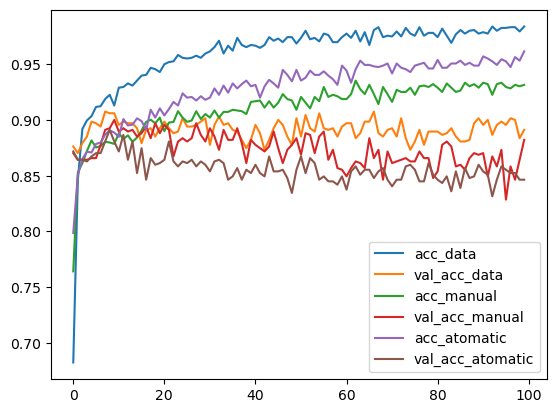

In [35]:
plt.plot(pd.DataFrame(history_3_data.history['accuracy']), label='acc_data')
plt.plot(pd.DataFrame(history_3_data.history['val_accuracy']), label='val_acc_data')
plt.plot(pd.DataFrame(history_3_manual.history['accuracy']), label='acc_manual')
plt.plot(pd.DataFrame(history_3_manual.history['val_accuracy']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_3_atomatic.history['accuracy']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_3_atomatic.history['val_accuracy']), label='val_acc_atomatic')

plt.legend()
plt.show()

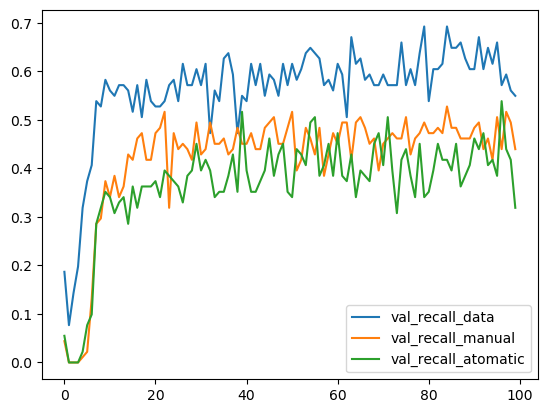

In [36]:
plt.plot(pd.DataFrame(history_3_data.history['val_recall_6']), label='val_recall_data')
plt.plot(pd.DataFrame(history_3_manual.history['val_recall_7']), label='val_recall_manual')
plt.plot(pd.DataFrame(history_3_atomatic.history['val_recall_8']), label='val_recall_atomatic')

plt.legend()
plt.show()

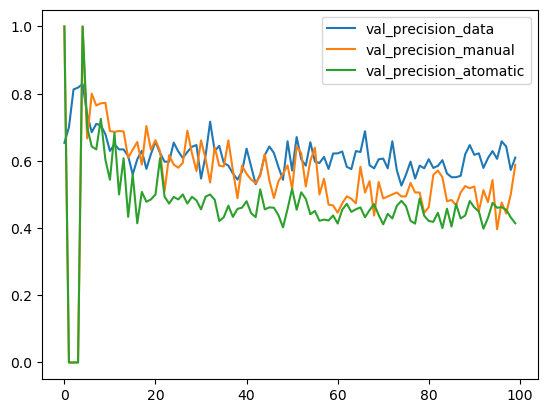

In [37]:
plt.plot(pd.DataFrame(history_3_data.history['val_precision_6']), label='val_precision_data')
plt.plot(pd.DataFrame(history_3_manual.history['val_precision_7']), label='val_precision_manual')
plt.plot(pd.DataFrame(history_3_atomatic.history['val_precision_8']), label='val_precision_atomatic')

plt.legend()
plt.show()